100% = "TF def"  en bas de l'écran

In [1]:
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [54]:
#import spike
#from spike.Interactive import INTER as I 
#I.hidecode(message="")
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter, plot, figure, text, title, xlabel, ylabel, subplots
import numpy as np
from numpy import exp, cos, sin, arctan2, pi, linspace, arange

from ipywidgets import Button, interactive
import ipywidgets as widgets
from IPython.display import display, HTML, Javascript, Markdown, Image

matplotlib.style.use("fivethirtyeight")
for i in ('font.size','axes.labelsize','legend.fontsize','legend.title_fontsize'):
    matplotlib.rcParams[i]=24
for i in ('xtick.labelsize', 'ytick.labelsize'):
    matplotlib.rcParams[i]=18

#matplotlib.style.available

# Elements of Data Analysis in 1D
# and 2D FTICR-MS data

*Marc-André Delsuc - 2nd Advanced User School, Prague, Sept 2021*

---

## 3 parts
- ### The Fourier Transform - the basic aspects
- ### The basic FT-ICR experiment
- ### more advanced aspects

![ ](files/white.pg)

The slides presented during this meeting are available under a CC BY-SA licence at `github.com/delsuc/2nd-AUS-FTICR`

# The Fourier Transform - the basic aspects
### 2nd-AUS-FTICR
*Marc-André Delsuc - Prague 26-30 Sept 2021*


This work is licensed under [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)

a developed content of this part can be found on [github.com/delsuc](https://github.com/delsuc/Fourier_Transform/blob/master/Definition_Properties.ipynb)

# Fourier Transform Definition

Fourier Transform is defined on continuous functions:

for a function $f(x)$  $x \in \mathbb{R} \rightarrow f(x) \in \mathbb{C}$

the **Fourier transform** of $f$ is another function $F$ 

$F(X)$  $X \in \mathbb{R} \rightarrow F(X) \in \mathbb{C}$

$$
f \xrightarrow{FT} F
$$

$$
F(X) = \int_{-\infty}^{+\infty} f(x) e^{-2i \pi x X} dx
$$

# <center>❓️</center> 

# <center>😭 $\quad$or$\quad$ 🤣</center>

### Time vs Frequency - One example 
<img style="width:1000px" src="files/cochlea.png">



### Time vs Frequency - One example
<img style="width:500px" src="files/cochlea.png">

- $f(t)$  pressure wave / function of time.
- ear-drum vibrate with the same pattern $\rightarrow$ standing wave in the cochlea $\rightarrow$ *position F( frequency )* 

    - $\Rightarrow$ a mechanical Fourier transform !

- phonetic pattern is somehow the time-dependent **Fourier transform** of the inital pressure wave.
- They both carry somehow the same information, but in a very different way.
- 2 point of views for the same information

# Fourier Transform Definition (2)

using $x \rightarrow t$ as time

and $X \rightarrow \omega$ as frequency

$$
\textrm{the expression} \quad \quad \int_{-\infty}^{+\infty} f(t) e^{-2i \pi t \omega} dt
$$

is just a way to **weigh** the presence of a given frequency $\omega : e^{-2i \pi \omega t}$ in $f(t)$


$x$ and $X$ represent two different reciproqual quantitites, and can be found in many domains

|$x$   |$X$   |
| ----- | ----- |
| $t$ : time (sec) | $\omega$ : frequency (Hz) |
| $x$ : space (Å) | $k$ : spacial frequency (Å$^{-1}$) |
| $\lambda$ : wavelength ($cm$) | $k$ : spacial frequency ($cm^{-1}$) |
| etc... | |

### exemple on a real data-set !
ECD fragmentation of a mixture of 4 histone peptides with various PTM *from M. van Agthoven - Innsbruck*

In [78]:
import spike
from spike.File import BrukerMS as bkMS
d = bkMS.Import_1D("files/histonepeptide_ms2_000002.d/fid")

Using 3 parameters calibration,  Warning calibB is -ML2


FTICR data-set
Bo: 7.05
Single Spectrum data-set
FT-ICR axis at 535.714286 kHz,  524288 real points,  from physical mz =  202.203   to m/z = 1450.000  R max (M=400) = 265036

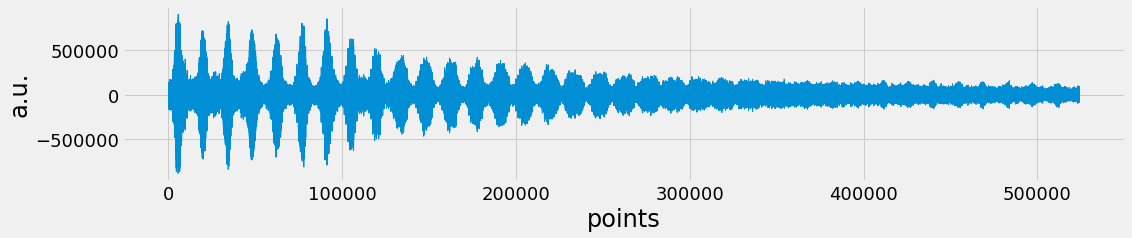

In [77]:
figure(figsize=(16, 3))
d.display(new_fig=False)

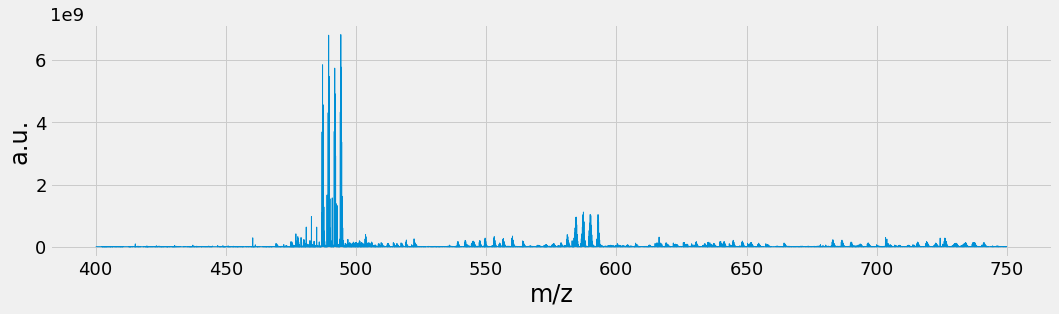

In [82]:
figure(figsize=(16,4))
D = d.copy().center().kaiser(4).zf(2).rfft().modulus()
D.set_unit('m/z').display(zoom=(400,750),new_fig=False);

**zooming on the main peptides** *(20 Thomson wide)*

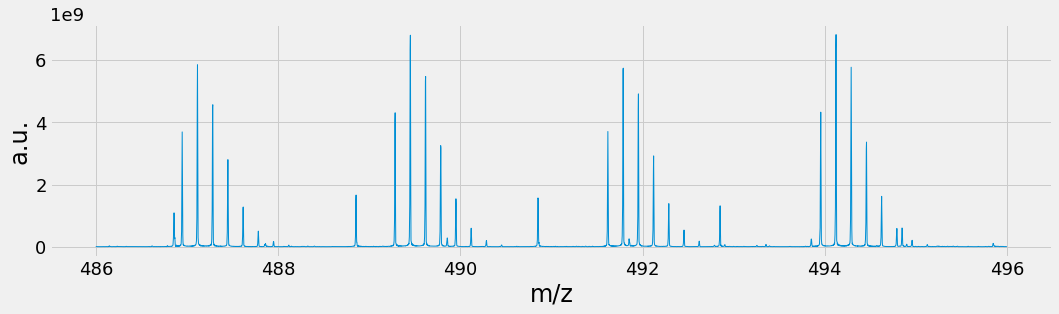

In [84]:
display(Markdown("**zooming on the main peptides** *(10 Thomson wide)*"))
figure(figsize=(16,4))
D.display(zoom=(486, 496),new_fig=False);

**zooming on smaller fragments** *( 5 Thomson wide - $\times 50$ )*

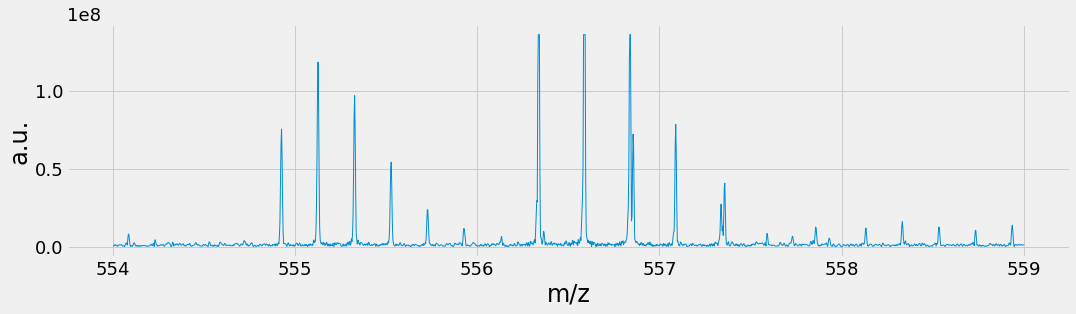

In [91]:
display(Markdown(r"**zooming on smaller fragments** *( 5 Thomson wide - $\times 50$ )*"))
figure(figsize=(16,4))
D.display(zoom=(554, 559),scale=50,new_fig=False);

## a brief reminder on complex numbers.
- *complex numbers are central to Fourier analysis, and their understanding is needed to fully comprehend the beauty of Fourier analysis*

#### **Real** numbers are *regular* numbers, going from $-\infty$ to $+\infty$.
- They belong to $\mathbb{R}$, the set of all real numbers
- $\mathbb{R}$ can be seen as a line, going from $-\infty$ to $+\infty$.

#### If Reals are on a line, **Complex** numbers are on a plane. 

As any plane, the coordinates are defined on two axes, the horizontal axis is the $\mathbb{R}$ line, the vertical one is the *Imaginary* axis, also holding real numbers, and labeled with $i$.
This plane is called $\mathbb{C}$ the complex plane.

A complex number $z$ (a point in this plane) is thus described with two numbers, $a$ and $b$: $$z = a +ib$$
$a$ is the real part, and $b$ the imaginary part.



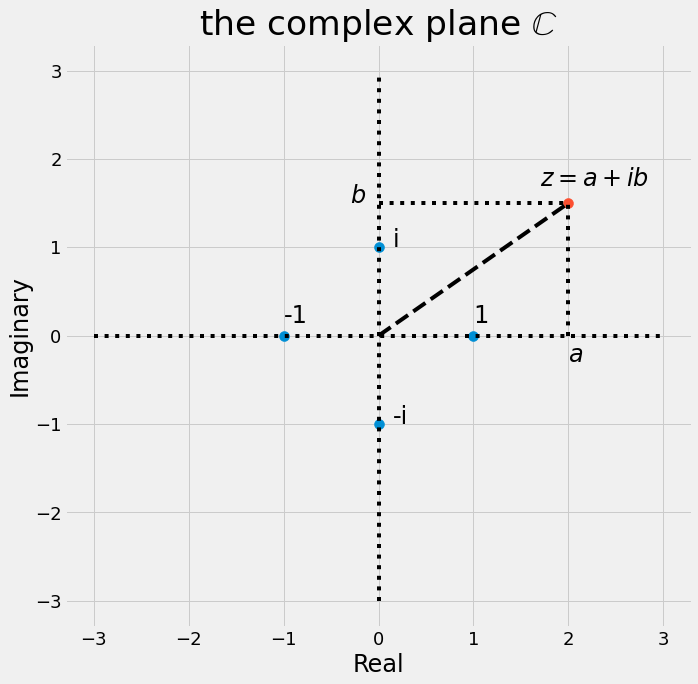

In [3]:
# let's draw this
figure(figsize=(10,10))
plot([-3,3],[0,0],':k') # the real axis
plot([0,0],[-3,3],':k') # the imaginary axis
scatter([1,0,-1,0],[0,1,0,-1], 100)
text(1,0.15,'1')
text(-1,0.15,'-1')
text(0.15,1,'i')
text(0.15,-1,'-i')
title('the complex plane $\mathbb{C}$')
a = 2
b = 1.5
z = a + 1j*b             #  i is noted j in python
scatter(z.real, z.imag, 100)
plot([0,z.real],[0,z.imag],'--k')
plot([z.real,z.real],[0,z.imag],':k')
plot([0,z.real],[z.imag,z.imag],':k')
xlabel("Real")
ylabel("Imaginary")

text(a, -0.3, '$a$')
text(-0.3, b,'$b$')
text(a-0.3,b+0.2,'$z = a +ib$');


**modulus**
$$ |z| = R = \sqrt{a^2 + b^2} $$

**argument** (*usually noted with a greek letter*)
$$ arg(z) = \arctan \left(\frac b a \right) = \theta$$

This is noted using the *Euler* notation:
$$ z = a+ib \\
z = Re^{i \arg(z)} = Re^{i \theta} $$

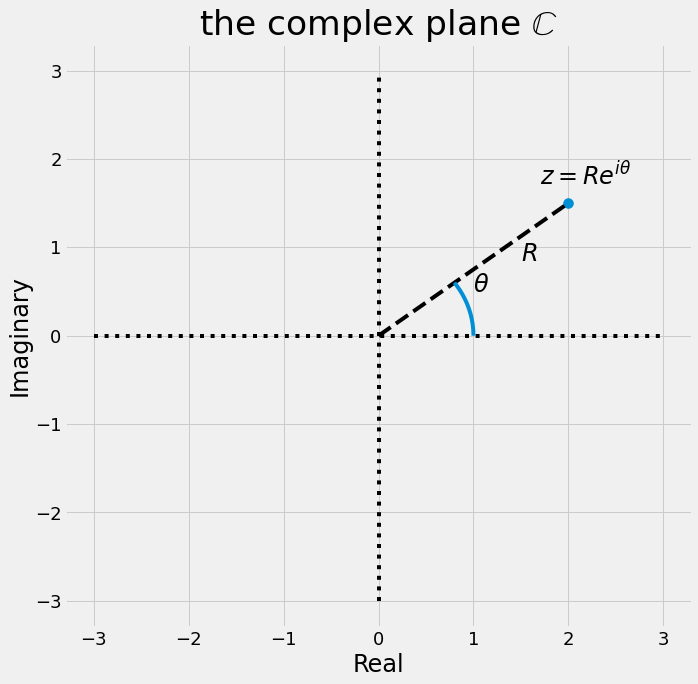

In [4]:
# let's draw this
figure(figsize=(10,10))
plot([-3,3],[0,0],':k') # the real axis
plot([0,0],[-3,3],':k') # the imaginary axis
title('the complex plane $\mathbb{C}$')
a = 2
b = 1.5
z = a + 1j*b             #  i is noted j in python
scatter(z.real, z.imag, 100)
plot([0,z.real],[0,z.imag],'--k')

xlabel("Real")
ylabel("Imaginary")

text(a-0.3,b+0.2,r'$z = R e^{i \theta}$');

t = linspace(0, np.arctan2(b,a),30)
plot(cos(t),sin(t))
text(a-0.5, b/2+0.1, '$R$')

text(1,0.5, r'$\theta$');

Complex numbers can be added and multiplied, they form an **algebra**.

The Euler Notation stresses the multiplicative rules, where **modulus** are multiplied, and **angles** are added.

$$ z_1 . z_2 = R_1 e^{i\theta_1 }  .  R_2 e^{i\theta_2}\\
   z_1 . z_2 = R_1 R_2 e^{i(\theta_1 + \theta_2)}
$$


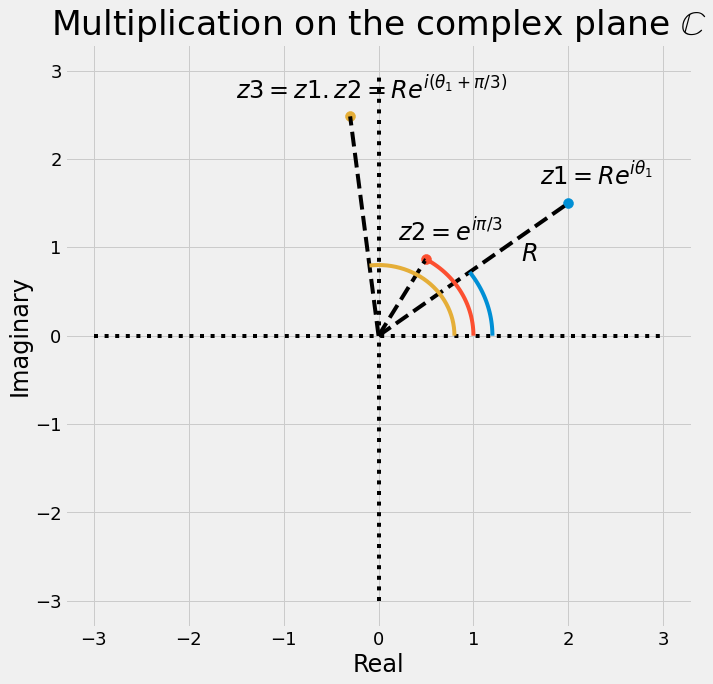

In [5]:
# let's draw this
figure(figsize=(10,10))
plot([-3,3],[0,0],':k') # the real axis
plot([0,0],[-3,3],':k') # the imaginary axis
title('Multiplication on the complex plane $\mathbb{C}$')
z1 = a + 1j*b                             #  i is noted j in python
c = cos(pi/3)
d = sin(pi/3)
z2 = c + 1j*d
xp = (z1*z2).real
yp = (z1*z2).imag
scatter(a, b, 100)
scatter(c, d, 100)
scatter(xp, yp, 100)

plot([0,a],[0,b],'--k')
plot([0,c],[0,d],'--k')
plot([0,xp],[0,yp],'--k')

xlabel("Real")
ylabel("Imaginary")

text(a-0.3,b+0.2,r'$z1 = R e^{i \theta_1}$');
text(c-0.3,d+0.2,r'$z2 = e^{i \pi / 3}$');
text(xp-1.2, yp+0.2, r'$z3 = z1 . z2 = R e^{i (\theta_1 + \pi/3)}$');

text(a-0.5, b/2+0.1, '$R$')

t1 = linspace(0, arctan2(b,a),30)
plot(1.2*cos(t1), 1.2*sin(t1))

t2 = linspace(0, pi/3,30)
plot(cos(t2), sin(t2))

t3 = linspace(0, arctan2(yp,xp),30)
plot(0.8*cos(t3), 0.8*sin(t3));


You have a more detailed (in interactive) presentation in [the complex_reminder](https://github.com/delsuc/Fourier_Transform/blob/master/Definition_Properties.ipynb) on `github` 

*see also: [Wikipedia:Complex_plane](https://en.wikipedia.org/wiki/Complex_plane) *

# some useful properties of FT 

### Linearity
- $FT(A+B) = FT(A) + FT(B) \quad \quad$
FT of sum = sum of FT
- $\Rightarrow$ FT of a composite signal is just the sum of the FT of each component

### Invertible
- $f \xrightarrow{FT} F \quad \quad F \xrightarrow{FT^{-1}} f$
- actually $\quad \quad F^{-1} = F^{3}$
- 2 different points of view of the SAME information ! $\quad$ *(~ rotating by 90° in information space)*

### Unitary
- *if $F$ is the FT of $f$*
$\quad \int |f(t)|^2 dt = \int |F(\omega)|^2 d \omega \quad \quad$ FT of sum = sum of FT
- $\Rightarrow$ signal power is conserved




# some useful properties of FT *(2)*


### integrals
$F_o = \int f(t) dt \quad \quad f_o = \int F(\omega) d \omega$

### compaction theorem
### convolution theorem
- both are central !
- we shall see them later on !

# FT vs DFT

### *Fourier Transform*
- This Fourier transform is analytic, defined on continuous, infinite functions

### *Digital Fourier Transform*
- the counter part for **regularly** sampled data
$\quad x_n \rightarrow X_n \quad$ (with $n \in \{1 \cdots N\}$)

$$
X_n = \sum_{k=1}^N x_k e^{-2 \pi \frac{kn}{N} }
$$

This is the operation which is used *nearly* everywhere - and in particular in most FT-ICR processing.


The elements
$$
e^{ \frac{2 \pi k}{N} }
$$
are the $k$ roots of 1 of order $N$

so
$$
e^{\frac{2 \pi kn}{N} } = (e^{ \frac{2 \pi k}{N} })^n
$$
are these roots at the power $n$

In [9]:
# let's make it interactive
def Nroot(k=1,N=8):
    f,(ax) = subplots(figsize=(7,7))
    t = linspace(0, 2*pi,100)
    ax.plot([-1.3,1.3],[0,0],':k') # the real axis
    ax.plot([0,0],[-1.3,1.3],':k') # the imaginary axis
    ax.plot(np.cos(t), np.sin(t),':k')   # the unity circle
    scatter([1,0,-1,0],[0,1,0,-1], 100)
    text(1,0.15,'1')
    text(-1,0.15,'-1')
    text(0.15,1,'i')
    text(0.15,-1,'-i')

    z = exp(2j * pi /N)         # e^(2 i pi / N)
    zk = z**k
    ax.scatter(zk.real, zk.imag, 200, c='r',edgecolors='r')   # draw roots
    ax.plot([0,zk.real],[0,zk.imag],'r')
    ax.text(1.3*zk.real-0.1, 1.2*zk.imag, r"$e^{2 i \pi \frac{%d}{%d}}$"%(k,N), fontsize="xx-large")
    ax.set_axis_off()
    ax.set_title(r'showing $e^{2i\pi %d/%d}$ on the unity circle'%(k,N));
interactive(Nroot, k=(0,16), N=(2,16))

interactive(children=(IntSlider(value=1, description='k', max=16), IntSlider(value=8, description='N', max=16,…

## DFT / FT fundamental difference
- finite signal
    - time bounded signal
    - frequency bounded signal

## Nyquist relation

$$\Delta t = \frac 1 {2 F_{max}} \quad \quad \textrm{or}
\quad \quad F_{max} = \frac 1 {2 \Delta t}$$ 

sampling = 0.01 => Fmax = 50 Hz

- F1 (blue) = 45 Hz
- F2 (red) = 55 Hz

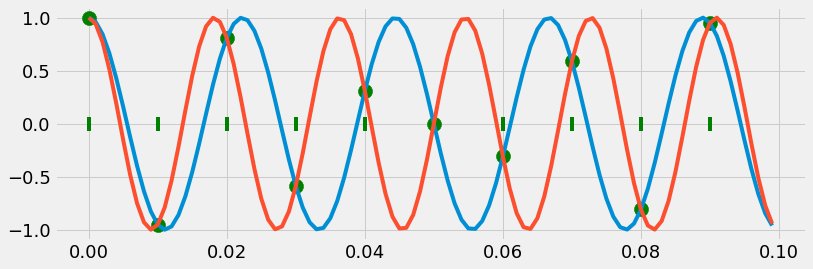

In [7]:
deltat = 0.01   # 10 msec => Fmax = 50Hz
t = 0.1*deltat * np.arange(100)   # oversampling x10 to draw
F1 = 45
F2 = 55
figure(figsize=(12,4))
plot(t, np.cos(2*pi*F1*t))
plot(t, np.cos(2*pi*F2*t))
for i in range(10):
    scatter(i*deltat, 0, 200, 'g', marker="|")
    scatter(i*deltat, np.cos(2*pi*F1*i*deltat), 200, 'g')
    

##  aliasing
sampling $\Rightarrow$ periodisation of the reciprocal space

- time sampling $\Rightarrow$ frequency periodisation
    - aliasing / folding
- frequency sampling $\Rightarrow$ time periodisation
    - time shifting


## fundamental relationships
$N$ points, acquired at sampling rate $\Delta t \Rightarrow N$ point spectrum sampled at $\Delta F$.


| Time domain | Frequency domain |
|:-----------:|:----------------:|
| $\Delta t$              | $\Delta F$ |
| $t_{max} = N \Delta t$  | $F_{max} = N \Delta F$ |
| $\Delta t = \frac 1 {2 F_{max}}$ | $\Delta F = \frac 1 {2 t_{max}}$ |
| $t_{max} = \frac 1 {2 \Delta F}$ | $F_{max} = \frac 1 {2 \Delta t}$ |

from which it comes
$$N = 2 F_{max} t_{max} \\
N = \frac 1 {2 \Delta t \Delta F}$$



## convolution
- rapidly
- periodisation / sampling - link 
    - with convolution
- 

## some algorithmic
DFT can be seen as the product of the signal series $\mathbf{x} = x_n$ of length $N$, by a $N \times N$ square matrix $\mathcal{M}$:

$$
\mathbf{X} = \mathcal{M} \mathbf{x} \\
X_n =  \sum_{k=1}^N x_k e^{2 \pi \frac{kn}{N} }
$$
so $\quad \mathcal{M}_{ij} = e^{2 \pi \frac{ij}{N}}$
is the matrix of the power of the $N$ roots of $1$ we have seen earlier.

As a matrix product, we expect the processing time to be $\propto N^2$.

HOWEVER, there is a fast algorithm, (*Cooley & Tuckey 1965*) called **FFT** 

- $\propto N \log_2(N)$   *much* faster for large data-sets.
- does not require matrix expression (*a* $512k \times 512k$ *matrix is not easy to handle on a computer* )
- faster if $N$ used

## Comparing FFT and DFT

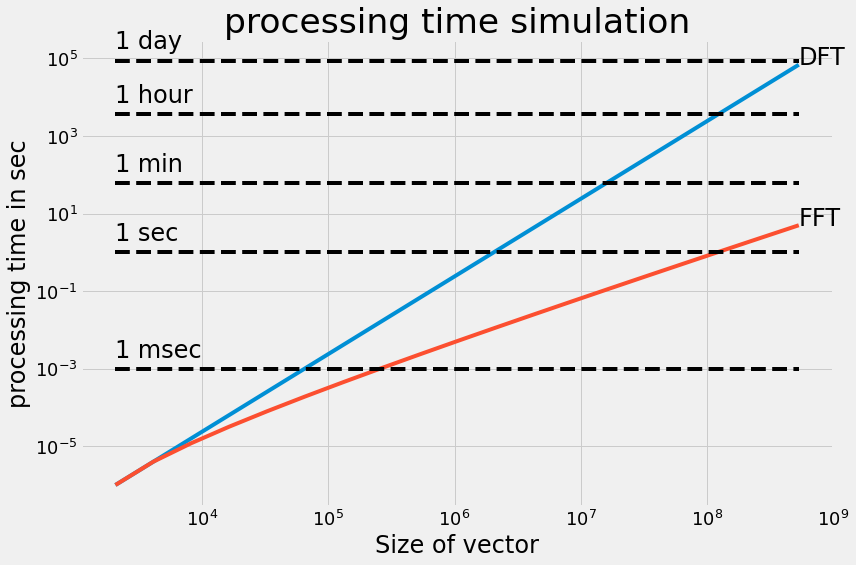

In [67]:
figure(figsize=(12,8))
P = np.arange(1,20)               # power of 2 
N = 1024*(2**P)                 # size of vectors, starting at 1k points
base = 1e-6/(N[0]**2)           # assume 1µsec processing for 1k vector ( my laptop )
DFT = base*(N**2)
plt.loglog(N, DFT, label='DFT')          # draw both
text(N[-1], DFT[-1], 'DFT')
FFT = 2*1024*base*N*P
plt.loglog(N, FFT, label='FFT')
text(N[-1], FFT[-1], 'FFT')
# some annotations
plt.title('processing time simulation')
plt.xlabel('Size of vector')
plt.ylabel('processing time in sec')
#plt.legend(loc=4)
plt.plot(N, [1E-3]*19, '--k'); plt.text(2*1024, 2E-3, '1 msec')
plt.plot(N, [1]*19, '--k');    plt.text(2*1024, 2, '1 sec')
plt.plot(N, [60]*19, '--k');   plt.text(2*1024, 120, '1 min')
plt.plot(N, [3600]*19, '--k'); plt.text(2*1024, 2*3600, '1 hour')
plt.plot(N, [24*3600]*19, '--k'); plt.text(2*1024, 50*3600, '1 day');

23 slides